# Temperature Slices

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [25]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [27]:
f = h5py.File('200_512_f32.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into a structure, called head

In [28]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [29]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [30]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [31]:
d  = f['density'][:]
GE = f['GasEnergy'][:]

In [32]:
f.close()

In [33]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [34]:
T = GE*(gamma - 1.0)*p_c / (n*kb)

In [35]:
print(np.min(T), np.max(T))

250.40210778793897 32938641.21378435


<h3>X-Z Slice</h3>

In [72]:
Tslice_xz = T[:,int(ny/2),:]

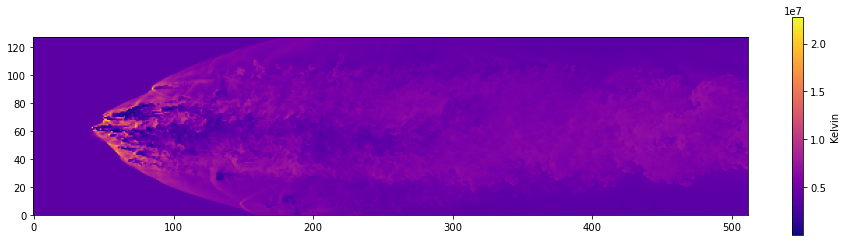

In [60]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(Tslice_xz.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='Kelvin')
plt.show()

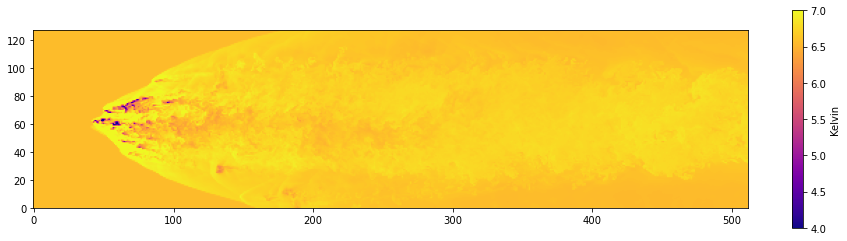

In [38]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(np.log10(Tslice_xz.T), origin='lower', cmap='plasma', vmin=4.0, vmax=7.0)
cb = plt.colorbar(image, label='Kelvin')
plt.show()

<h3>X-Y Slice</h3>

In [39]:
Tslice_xy = T[:,:,int(nz/2)]

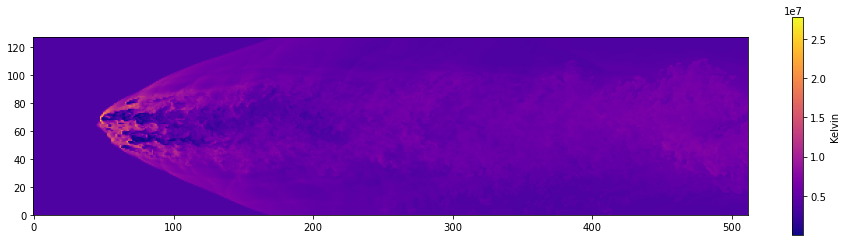

In [40]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(Tslice_xy.T, origin = 'lower', cmap = 'plasma')
cb = plt.colorbar(image, label = 'Kelvin')
plt.show()

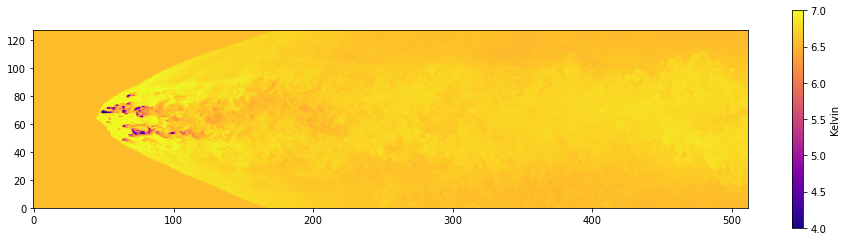

In [41]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(np.log10(Tslice_xy.T), origin='lower', cmap='plasma', vmin=4.0, vmax=7.0)
cb = plt.colorbar(image, label='Kelvin')
plt.show()

<h3>Y-Z Slice</h3>

In [42]:
Tslice_yz = T[int(nx/2),:,:]

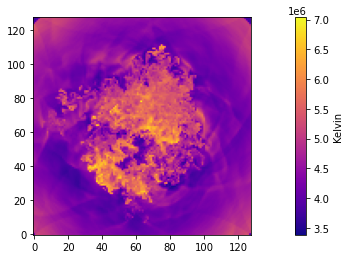

In [43]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(Tslice_yz.T, origin = 'lower', cmap = 'plasma')
cb = plt.colorbar(image, label = 'Kelvin')
plt.show()

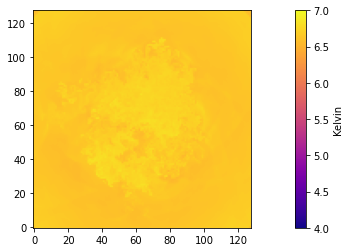

In [44]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(np.log10(Tslice_yz.T), origin='lower', cmap='plasma', vmin=4.0, vmax=7.0)
cb = plt.colorbar(image, label='Kelvin')
plt.show()